# Regresión Logística

### Función Sigmoide

![Logo](./sigmoid.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(datlinreg):
    return 1/(1+np.exp(-datlinreg))

![log es](./loges1.png)

In [3]:

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll


## Gradiente de Ascenso

![Logo](./gdrl.png)

In [4]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):

    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))

    weights = np.zeros(features.shape[1])

    for step in range(num_steps):
        # Producto entre parámetros y 
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = (target - predictions)
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))

    return weights

In [5]:
def prediccion(weights, dato):
    return sigmoid(np.dot(weights,datos))

10000


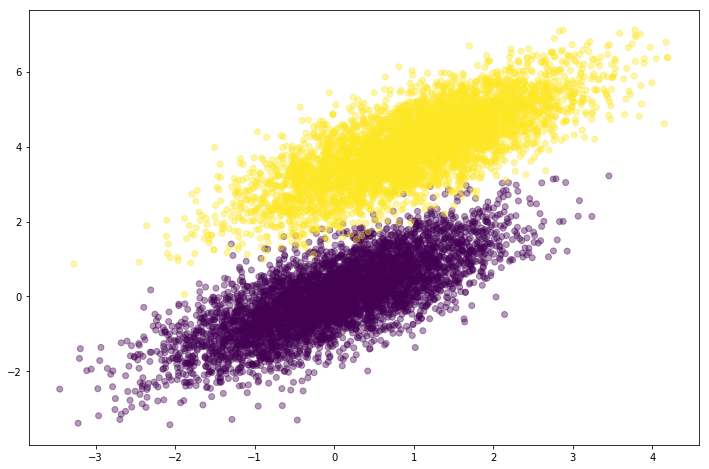

[0. 0. 0. ... 1. 1. 1.]
-4346.264779152365
-148.7067227680535
-142.9649362310784
-141.5453030715737
-141.06031965930796
-140.87031585891606
-140.79025912753815
-140.75505002269912
-140.73914503180953
-140.7318349891588
-140.72843666694826
-140.72684471255332
-140.72609508950467
-140.72574086052293
-140.7255730688718
-140.7254934578617
-140.72545564250748
-140.72543766614334
-140.72542911609156
-140.7254250479478
-140.72542311181698
-140.72542219020232
-140.7254217514527
-140.72542154256132
-140.72542144310114
-140.72542139574284
-140.72542137319246
-140.72542136245457
-140.72542135734142
-140.72542135490647


In [6]:
np.random.seed(12)

num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

print(x1.size)
simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                                  np.ones(num_observations)))

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
                c = simulated_labels, alpha = .4)
plt.show()
print(simulated_labels)
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                         num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

In [11]:
x = np.linspace(-4, 4, 5000)

5000

In [9]:
pesos = []

for w in weights:
    pesos.append(weights/w)

pesos = np.array(pesos)

print(pesos)

[[ 1.          0.35899126 -0.58823498]
 [ 2.78558316  1.         -1.63857746]
 [-1.7000009  -0.61028546  1.        ]]


-1.638577464900993


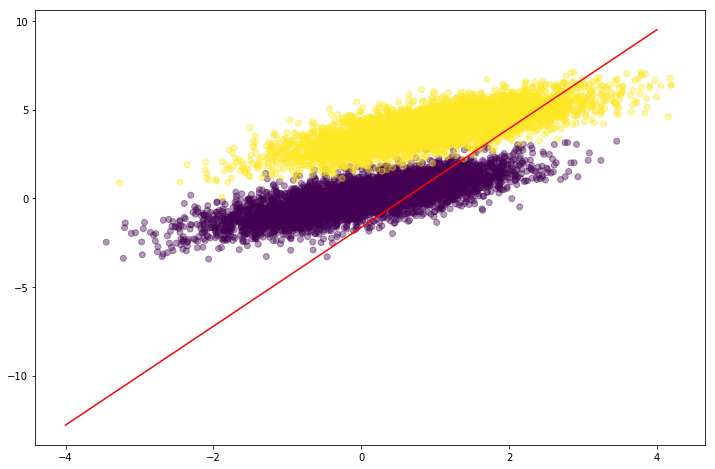

In [23]:
plt.figure(figsize=(12,8))
print(pesos[1][2])
plt.plot(x, pesos[1][0]*x + pesos[1][2], c = 'r')

plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
                c = simulated_labels, alpha = .4)
plt.show()